# Comparison between full wavefield and diffusive approximation for a fullspace

Play around to see that the difference is getting bigger for
- higher frequencies,
- higher eperm/mperm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
# Style adjustments
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

### Define model

In [3]:
x = (np.arange(1051))*10-500
rx = np.repeat([x,],np.size(x),axis=0)
ry = rx.transpose()
zsrc= 150
zrec = 200
res = 1/3
freq = 0.5
ab = 11
aniso = np.sqrt(3/.3)
perm = 1
inp = {'src': [0, 0, zsrc],
       'rec': [rx.ravel(), ry.ravel(), zrec],
       'res': res,
       'freqtime': freq,
       'aniso': aniso,
       'ab': ab,
       'epermH': perm,
       'epermV': perm,
       'mpermH': perm,
       'mpermV': perm,
       'verb': 0}

### Calculation

In [4]:
# Halfspace
hs = epm.analytical(**inp, solution='dfs')
hs = hs.reshape(np.shape(rx))

# Fullspace
fs = epm.analytical(**inp)
fs = fs.reshape(np.shape(rx))

# Relative error (%)
amperr = np.abs((np.abs(fs) - np.abs(hs))/np.abs(fs))*100
phaerr = np.abs((np.angle(fs) - np.angle(hs))/np.angle(fs))*100

### Plot

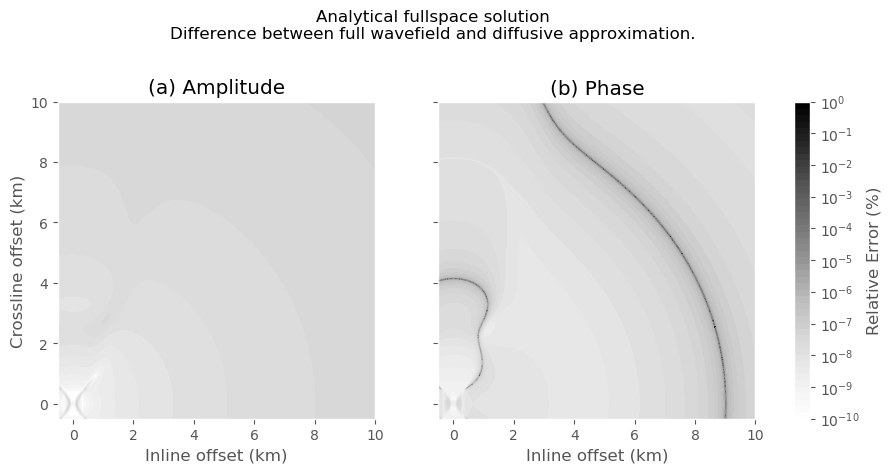

In [5]:
fig, axs = plt.subplots(figsize=(10, 4.2), nrows=1, ncols=2, sharex=True, sharey=True)

# Min and max, properties
vmin = 1e-10
vmax = 1e0
props = {'levels': np.logspace(np.log10(vmin), np.log10(vmax), 50),
         'locator': plt.matplotlib.ticker.LogLocator(), 'cmap': 'Greys'}

# Plot amplitude error
plt.sca(axs[0])
plt.title(r'(a) Amplitude')
cf1 = plt.contourf(rx/1000, ry/1000, amperr.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')
plt.xlabel('Inline offset (km)')
plt.xlim(min(x)/1000, max(x)/1000)
plt.ylim(min(x)/1000, max(x)/1000)
plt.axis('equal')    

# Plot phase error
plt.sca(axs[1])
plt.title(r'(b) Phase')
cf2 = plt.contourf(rx/1000, ry/1000, phaerr.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')
plt.xlim(min(x)/1000, max(x)/1000)
plt.ylim(min(x)/1000, max(x)/1000)
plt.axis('equal') 

# Title
plt.suptitle('Analytical fullspace solution\nDifference between full wavefield and diffusive approximation.',
             y=1.1)

# Plot colorbar
cax, kw = plt.matplotlib.colorbar.make_axes([axs[0], axs[1]], location='right', fraction=.05, pad=0.05, aspect=20)
cb = plt.colorbar(cf2, cax=cax, ticks=10**(-(np.arange(13.)[::-1])+2), **kw)
cb.set_label(r'Relative Error $(\%)$')

# Show
plt.show()

In [6]:
epm.versions('HTML')